# Benchmarking doubelt detection methods with Demuxlet data sets

In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

dat_dir = "../data/"
os.chdir(dat_dir)

### Load data

#### Demuxlet

In [151]:
demux_ctrl = pd.read_csv(dat_dir + "/demux_ctrl/demux_table.tsv.gz", sep = "\t")
demux_stim = pd.read_csv(dat_dir + "/demux_stim/demux_table.tsv.gz", sep = "\t")

demux_ctrl['doublet'] = demux_ctrl['multiplets'] == 'doublet'
demux_stim['doublet'] = demux_stim['multiplets'] == 'doublet'

In [152]:
demux_ctrl[:5]

,cellID,tsne1,tsne2,ind,stim,cluster,cell,multiplets,doublet
0,AAACATACAATGCC-1,-4.277833,-19.294709,107,ctrl,5,CD4 T cells,doublet,True
1,AAACATACATTTCC-1,-27.640373,14.966629,1016,ctrl,9,CD14+ Monocytes,singlet,False
2,AAACATACCAGAAA-1,-27.493646,28.924885,1256,ctrl,9,CD14+ Monocytes,singlet,False
3,AAACATACCAGCTA-1,-28.132584,24.925484,1256,ctrl,9,CD14+ Monocytes,doublet,True
4,AAACATACCATGCA-1,-10.468194,-5.984389,1488,ctrl,3,CD4 T cells,singlet,False


#### DoubletFinder

In [153]:
dbfinder_ctrl = pd.read_csv(dat_dir + "/demux_ctrl/doubletFinder_table.tsv", 
                            header=None, sep="\t", names=['cellID', 'score', 'label'])
dbfinder_ctrl.cellID = [x + "-1" for x in dbfinder_ctrl.cellID]
dbfinder_ctrl['doublet'] = dbfinder_ctrl['label'] == "Doublet"
print(np.mean(dbfinder_ctrl.cellID == demux_ctrl.cellID))

1.0


In [154]:
dbfinder_stim = pd.read_csv(dat_dir + "/demux_stim/doubletFinder_table.tsv", 
                            header=None, sep="\t", names=['cellID', 'score', 'label'])
dbfinder_stim.cellID = [x + "-1" for x in dbfinder_stim.cellID]
dbfinder_stim['doublet'] = dbfinder_stim['label'] == "Doublet"
print(np.mean(dbfinder_stim.cellID == demux_stim.cellID))

1.0


In [155]:
print(dbfinder_stim[:5])
print(np.mean(dbfinder_stim.label == "Doublet"))

             cellID    score    label  doublet
0  AAACATACCAAGCT-1  0.19619  Singlet    False
1  AAACATACCCCTAC-1  0.39527  Doublet     True
2  AAACATACCCGTAA-1  0.08886  Singlet    False
3  AAACATACCCTCGT-1  0.22504  Singlet    False
4  AAACATACGAGGTG-1  0.05020  Singlet    False
0.1444690571784577


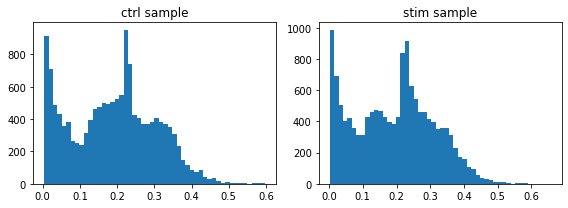

In [156]:
fig = plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
plt.hist(dbfinder_ctrl.score, bins=50)
plt.title("ctrl sample")

plt.subplot(1, 2, 2)
plt.hist(dbfinder_stim.score, bins=50)
plt.title("stim sample")

plt.tight_layout()
plt.show()

#### scrublet

In [186]:
scrublet_ctrl = pd.read_csv(dat_dir + "/demux_ctrl/scrublet_table.tsv", 
                            header=0, sep="\t", names=['cellID', 'score', 'doublet'])
scrublet_stim = pd.read_csv(dat_dir + "/demux_stim/scrublet_table.tsv", 
                            header=0, sep="\t", names=['cellID', 'score', 'doublet'])

print(np.mean(scrublet_ctrl.cellID == demux_ctrl.cellID))
print(np.mean(scrublet_stim.cellID == demux_stim.cellID))

1.0
1.0


In [187]:
print(np.mean(scrublet_ctrl.doublet))
print(np.mean(scrublet_stim.doublet))
scrublet_stim[:5]

0.10739448662699227
0.1084037103696525


,cellID,score,doublet
0,AAACATACCAAGCT-1,0.093,False
1,AAACATACCCCTAC-1,0.121,False
2,AAACATACCCGTAA-1,0.249,False
3,AAACATACCCTCGT-1,0.073,False
4,AAACATACGAGGTG-1,0.317,True


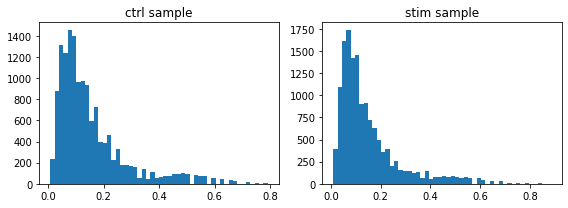

In [159]:
fig = plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
plt.hist(scrublet_ctrl.score, bins=50)
plt.title("ctrl sample")

plt.subplot(1, 2, 2)
plt.hist(scrublet_stim.score, bins=50)
plt.title("stim sample")

plt.tight_layout()
plt.show()

## Comparison

In [180]:
def scatter_with_label(x, y, label1, label2, title="",
                       names=['Single', 'SNP', 'GEX', 'Both']):
    idx0 = (label1 == False) * (label2 == False)
    idx1 = (label1 == True)  * (label2 == False)
    idx2 = (label1 == False) * (label2 == True)
    idx3 = (label1 == True)  * (label2 == True)

    plt.scatter(x[idx0], y[idx0], s=1, label=names[0], color="lightgray")
    plt.scatter(x[idx1], y[idx1], s=1, label="%s: %d" %(names[1], sum(idx1)), color='#4796d7')
    plt.scatter(x[idx2], y[idx2], s=1, label="%s: %d" %(names[2], sum(idx2)), color='#79a702')
    plt.scatter(x[idx3], y[idx3], s=1, label="%s: %d" %(names[3], sum(idx3)), color='#df5858')
    
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("%s: %d cells" %(title, len(x)))
    plt.legend(loc="best", markerscale=5)

### Stimulated sample

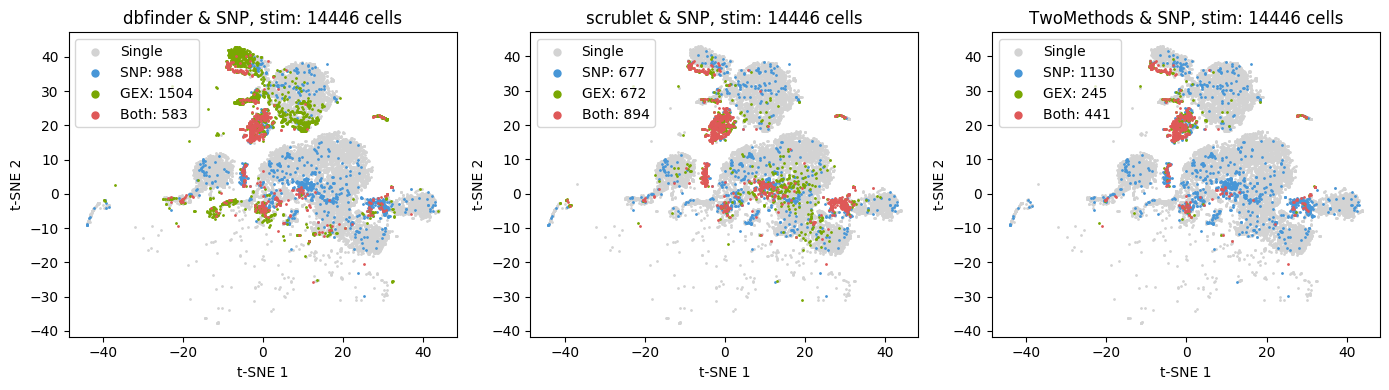

In [181]:
fig = plt.figure(figsize=(14, 4), dpi=100)

### doubletFinder
plt.subplot(1, 3, 1)
scatter_with_label(demux_stim['tsne1'], demux_stim['tsne2'],
                   demux_stim['doublet'], dbfinder_stim['doublet'],
                   title='dbfinder & SNP, stim')

### scrublet
plt.subplot(1, 3, 2)
scatter_with_label(demux_stim['tsne1'], demux_stim['tsne2'],
                   demux_stim['doublet'], scrublet_stim['doublet'],
                   title='scrublet & SNP, stim')

### Combine two methods
plt.subplot(1, 3, 3)
scatter_with_label(demux_stim['tsne1'], demux_stim['tsne2'],
                   demux_stim['doublet'], 
                   scrublet_stim['doublet'] * dbfinder_stim['doublet'],
                   title='TwoMethods & SNP, stim')

plt.tight_layout()
plt.savefig("../examples/images/compare_stim.png", dpi=300)
plt.show()

## Comparison on control sample

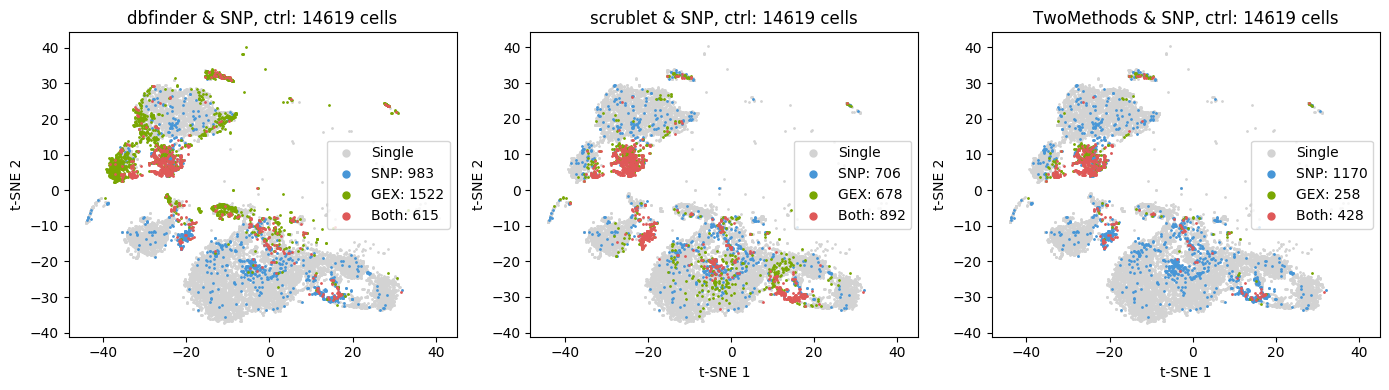

In [182]:
fig = plt.figure(figsize=(14, 4), dpi=100)

### doubletFinder
plt.subplot(1, 3, 1)
scatter_with_label(demux_ctrl['tsne1'], demux_ctrl['tsne2'],
                   demux_ctrl['doublet'], dbfinder_ctrl['doublet'],
                   title='dbfinder & SNP, ctrl')

### scrublet
plt.subplot(1, 3, 2)
scatter_with_label(demux_ctrl['tsne1'], demux_ctrl['tsne2'],
                   demux_ctrl['doublet'], scrublet_ctrl['doublet'],
                   title='scrublet & SNP, ctrl')

### Combine two methods
plt.subplot(1, 3, 3)
scatter_with_label(demux_ctrl['tsne1'], demux_ctrl['tsne2'],
                   demux_ctrl['doublet'], 
                   scrublet_ctrl['doublet'] * dbfinder_ctrl['doublet'],
                   title='TwoMethods & SNP, ctrl')

plt.tight_layout()
plt.savefig("../examples/images/compare_ctrl.png", dpi=300)
plt.show()

#### Pre-process